In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import math

from datetime import time, timedelta, datetime, date


plt.rcParams['figure.figsize'] = [10, 5]


# Definição de diretórios e Disco de leitura dos arquivos (Desktop ou Notebook) 
config_dirs = open("prefixo_dados.txt").readlines() 
DIR_PREFIXO = Path(config_dirs[0].strip())


DIRETORIO_PRINCIPAL =  DIR_PREFIXO / "Projeto_PA" / "Projeto_PA_validado"
DIRETORIO_DATASET = DIR_PREFIXO / "Projeto_PA"

DIR_ABORDAGENS = DIRETORIO_PRINCIPAL / "analise_abordagens"
DIR_GRAFICOS_SALVOS = DIR_ABORDAGENS / "graficos"
DIR_KMEANS = DIRETORIO_PRINCIPAL / "KMeansRandom"
DIR_DICT = DIRETORIO_PRINCIPAL / "DICT"
DIR_NMF = DIRETORIO_PRINCIPAL / "NMF"



In [2]:
caminho = DIRETORIO_PRINCIPAL / DIR_KMEANS
caminho
diretorios = {'dict':DIR_DICT,'kmeans':DIR_KMEANS, 'nmf':DIR_NMF}

nome_abordagem = {'cadastro':"_approach_cadastro", 'doenca':"_approach_doenca",
                  'medidas':"_approach_medidas",'estatistica':"_approach_estatistica",
                 'escolho_doenca':"_approach_escolho_doenca", 'categorias':"_approach_classes"}

In [3]:
analise = 'dict'
print(analise.capitalize())

Dict


In [4]:
#DIR_DICT / f"Dict_approach_doenca
#_grupo_{grupo}.csv", 

# Análise é uma opção do dicionário criado na célula acima
algoritmo = input("Informe a analise ")

caminho_medidas = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['medidas']}"
caminho_estatistica = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['estatistica']}"
caminho_doenca = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['doenca']}"
caminho_cadastro = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['cadastro']}"
caminho_escolho_doenca = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['escolho_doenca']}"
caminho_categorias = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['categorias']}"


Informe a analise kmeans


In [5]:
# 3 Abordagens

abordagem_cadastro    = list()
abordagem_medidas     = list()
abordagem_estatistica = list()
abordagem_doenca      = list()
abordagem_escolho_doenca = list()
abordagem_categorias  = list()

try:
    grupo_leitura = 1
    while 1:

        abordagem_estatistica.append(pd.read_csv(f"{caminho_estatistica}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1   
except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_medidas.append(pd.read_csv(f"{caminho_medidas}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_doenca.append(pd.read_csv(f"{caminho_doenca}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1
except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_cadastro.append(pd.read_csv(f"{caminho_cadastro}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_escolho_doenca.append(pd.read_csv(f"{caminho_escolho_doenca}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_categorias.append(pd.read_csv(f"{caminho_categorias}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

In [6]:
#print(f"{caminho_doenca}_grupo_{1}.csv")
#print(f"{caminho_medidas}_grupo_{1}.csv")
#print(f"{caminho_estatistica}_grupo_{1}.csv")
#print(f"{caminho_cadastro}_grupo_{1}.csv")

In [7]:
#  variáveis

# Valores de Referência Normal das Sistólicas e Diastólicas
max_sist = 140
min_sist = 100
max_diast = 90
min_diast = 60

# PERÍODOS 
#      Matutino 6h-8h59       Dataset 6h-8h45
#      Diurno 9h-20h59                9h-20h45
#      Vespertino 21h-22h59           21h-22h45
#      Noturno 23h-05h59              23h-5h30

matutino = (time(6,0), time(9,0))
diurno = (time(9,0), time(21,0))
vespertino = (time(21,0), time(1,0))
noturno = (time(1,0), time(6,0))

# Identificando o intervalo de todas as PASs e todas as PADs
#sist = mapas.loc[:,'sist 9:00':'sist 8:45']
#diast = mapas.loc[:,'diast 9:00':'diast 8:45']



In [8]:
def media_sistolica(medidas):
    dados = medidas.loc[:,'sist 9:00':'sist 8:45']
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def media_diastolica(medidas):
    dados = medidas.loc[:,'diast 9:00':'diast 8:45']
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def media_sistolica_dia(medidas):
    dados = pd.concat([medidas.loc[:,'sist 6:00':'sist 8:45'],
                   medidas.loc[:,'sist 9:00':'sist 20:45'],
                   medidas.loc[:,'sist 21:00':'sist 22:45']],axis=1)
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def media_sistolica_noite(medidas):
    dados = medidas.loc[:,'sist 23:00':'sist 5:30']
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def media_diastolica_dia(medidas):
    dados = pd.concat([medidas.loc[:,'sist 6:00':'sist 8:45'],
                   medidas.loc[:,'sist 9:00':'sist 20:45'],
                   medidas.loc[:,'sist 21:00':'sist 22:45']],axis=1)
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def media_diastolica_noite(medidas):
    dados = medidas.loc[:,'diast 23:00':'diast 5:30']
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def variancia_sistolica(medidas):
    dados = medidas.loc[:,'sist 9:00':'sist 8:45']
    return(np.round(np.mean(np.var(dados,axis=1)),2))

def variancia_diastolica(medidas):
    dados = medidas.loc[:,'diast 9:00':'diast 8:45']
    return(np.round(np.mean(np.var(dados,axis=1)),2))

def mediana_sistolica(medidas):
    dados = medidas.loc[:,'sist 9:00':'sist 8:45']
    return(np.median(np.median(dados,axis=1)))

def mediana_diastolica(medidas):
    dados = medidas.loc[:,'diast 9:00':'diast 8:45']
    return(np.median(np.median(dados,axis=1)))

def auc_sistolica(medidas):
    dados = medidas.loc[:,'sist 9:00':'sist 8:45']
    return(np.round(np.mean(np.trapz(dados,axis=1)),2))

def auc_diastolica(medidas):
    dados = medidas.loc[:,'diast 9:00':'diast 8:45']
    return(np.round(np.mean(np.trapz(dados,axis=1)),2))

def desvio_sistolica(medidas):
    dados = medidas.loc[:,'sist 9:00':'sist 8:45']
    return(np.round(np.mean(np.std(dados,axis=1)),2))

def desvio_diastolica(medidas):
    dados = medidas.loc[:,'diast 9:00':'diast 8:45']
    return(np.round(np.mean(np.std(dados,axis=1)),2))


lista_calculo = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                 'DP Sistolica em 24h','DP Diastolica em 24h']

funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
           media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
          auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica]

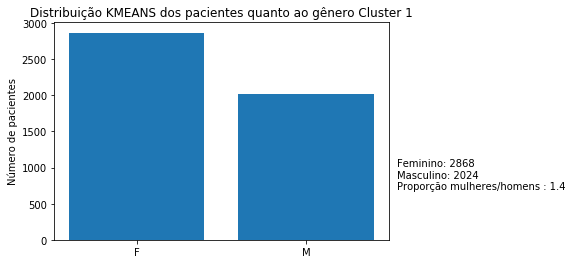

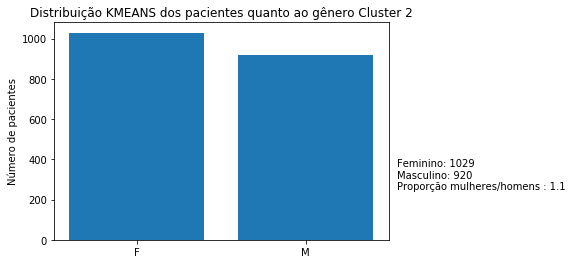

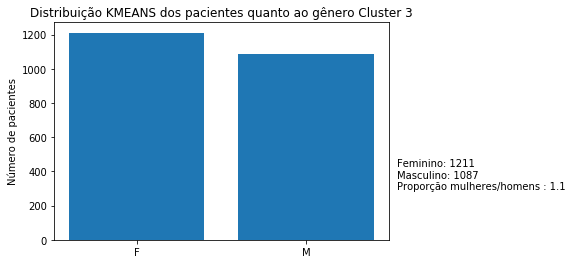

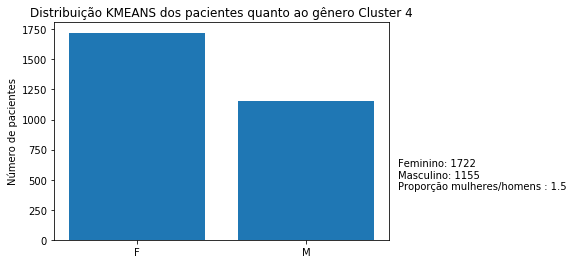

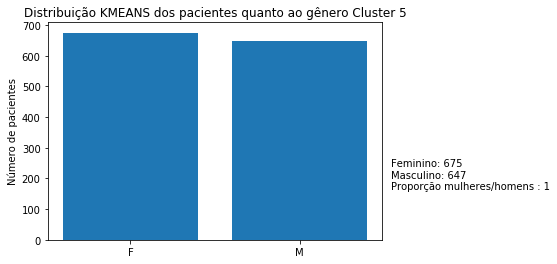

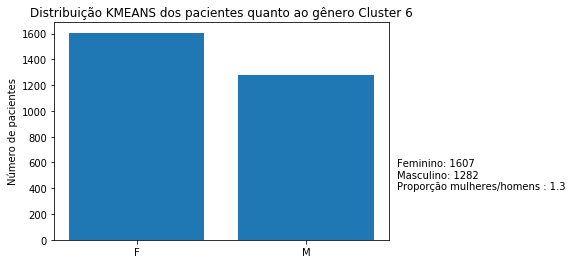

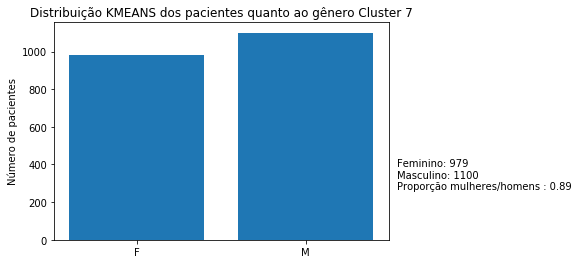

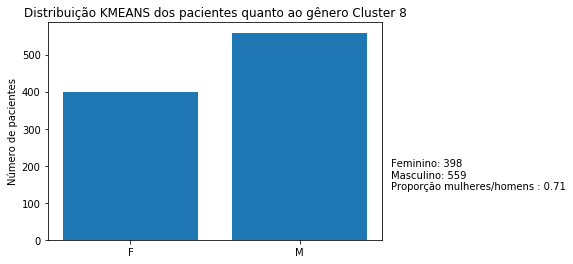

In [9]:
try:    
    def plota_histograma_genero(dados,grupo):

        gender = dados['genero'].value_counts()
        gender = gender[["F", "M"]]
        plt.bar(gender.index,gender)
        plt.gca().set(title=f'Distribuição {algoritmo.upper()} dos pacientes quanto ao gênero Cluster {grupo}', ylabel='Número de pacientes')

        legenda = f"Feminino: {gender['F']:n}\nMasculino: {gender['M']:n}"
        # Os operadores aumentados '+=', '-=', etc... fazem uma operação com, e guardam o resultado de volta, na variável da esquerda:
        # a = 10; a += 5 , resulta em a == 15
        legenda += "\n" + f"Proporção mulheres/homens : { gender['F'] / gender['M']:.02n}"
        plt.gcf().text(0.92, 0.3, legenda, fontsize=10)
        #plt.savefig(DIR_GRAFICOS / f"grafico_distribuicao_genero_.svg", bbox_inches='tight')
        plt.show()

    for grupo in range(len(abordagem_cadastro)):
        plota_histograma_genero(abordagem_cadastro[grupo],grupo + 1)
except:
    pass

## Qtd por Estatísitica

In [10]:
try:
    qtd_estatistica = pd.DataFrame()

    qtd_estatistica['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_estatistica) + 1)]
    qtd_estatistica['QTD Pacientes'] = [len(n) for n in abordagem_estatistica]

    total_pacientes = np.sum([len(n) for n in abordagem_estatistica])

    qtd_estatistica['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_estatistica]


    for analise in range(len(lista_calculo)):
        lista_analise = list()
        for grupo in range(len(abordagem_estatistica)):
            lista_analise.append(funcao[analise](abordagem_estatistica[grupo]))

        qtd_estatistica[lista_calculo[analise]] = lista_analise

    qtd_estatistica = qtd_estatistica.T.reset_index()
    qtd_estatistica.columns = qtd_estatistica.iloc[0,:]
    qtd_estatistica = qtd_estatistica.iloc[1:,:]

    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_estatistica.to_csv(DIR_ABORDAGENS / f"{algoritmo.upper()}_qtd_approach_estatistica.csv", 
                           sep=";", encoding="latin1", index=False)
except:
    pass

In [11]:
qtd_estatistica

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,QTD Pacientes,3265,4490,1697,2717,554,4377,2163
2,QTD Pacientes %,16.95,23.31,8.81,14.1,2.88,22.72,11.23
3,Media Sistolica em 24h,119.99,115.79,139.58,106.97,154.2,126.23,133.73
4,Media Diastolica em 24h,68.04,76.75,93.39,66.03,86.02,83.66,74.93
5,Media Sistolica Daytime,121.45,117.34,141.26,108.31,155.52,127.96,135.25
6,Media Sistolica Nighttime,112.9,108.28,131.45,100.48,147.78,117.8,126.3
7,Media Diastolica Daytime,121.45,117.34,141.26,108.31,155.52,127.96,135.25
8,Media Diastolica Nighttime,61.27,67.91,84.38,58.91,79.74,74.23,68.34
9,Variancia Sistolica em 24h,187.07,134.64,208.48,125.67,384.64,169.51,259.47
10,Variancia Diastolica em 24h,105.58,109.37,143.51,92.35,157.39,124.75,120.06


## Qtd por Doença

In [12]:
# Quantidade da abordagem por doença
try:
    lista_doencas = list(abordagem_doenca[0].loc[:,'Hipotensao':'Normotenso'].columns)

    qtd_doencas = pd.DataFrame()

    qtd_doencas['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_doenca) + 1)]

    total_pacientes = np.sum([len(n) for n in abordagem_doenca])

    qtd_doencas['QTD Pacientes'] = [len(n) for n in abordagem_doenca]

    qtd_doencas['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_doenca]

    for doenca in lista_doencas:
        lista_qtd = []
        lista_porcentagem = []
        for grupo in range(len(abordagem_doenca)):
            lista_qtd.append(len(abordagem_doenca[grupo][abordagem_doenca[grupo][doenca] == True]))
            lista_porcentagem.append(round(lista_qtd[grupo]/len(abordagem_doenca[grupo][doenca]) * 100,2))
        qtd_doencas[doenca] = lista_qtd
        qtd_doencas[f'{doenca} %'] = lista_porcentagem

    qtd_doencas = qtd_doencas.T.reset_index()
    qtd_doencas.columns = qtd_doencas.iloc[0,:]
    qtd_doencas = qtd_doencas.iloc[1:,:]

    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_doencas.to_csv(DIR_ABORDAGENS / f"{algoritmo.upper()}_qtd_approach_doenca.csv", 
                            sep=";", encoding="latin1", index=False)
except:
    pass

In [13]:
qtd_doencas

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8
1,QTD Pacientes,4892,1949,2298,2877,1322,2889,2079,957
2,QTD Pacientes %,25.4,10.12,11.93,14.94,6.86,15,10.79,4.97
3,Hipotensao,4892,1927,2118,2529,1280,2772,1845,0
4,Hipotensao %,100,98.87,92.17,87.9,96.82,95.95,88.74,0
5,Sistolica Isolada,2,1,1,6,0,11,0,2
6,Sistolica Isolada %,0.04,0.05,0.04,0.21,0,0.38,0,0.21
7,Diastolica Isolada,15,3,1,12,0,30,1,19
8,Diastolica Isolada %,0.31,0.15,0.04,0.42,0,1.04,0.05,1.99
9,Dipping,0,1949,2298,0,0,0,2079,0
10,Dipping %,0,100,100,0,0,0,100,0


## Qtd por Cadastro

In [14]:
def faixas_imc(imc):
    classes = ["Abaixo do peso","Peso Normal","Sobrepeso",
               "Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]
    intervalos = [(0, 18.5),(18.5, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    
    for faixa in range(len(classes)):
        if imc <= intervalos[faixa][1]:
            return classes[faixa]

def faixas_etarias(idade):
    classes = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]
    intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

In [15]:
def faixa_genero(cadastro):
    total = len(cadastro)
    masculino = len(cadastro[cadastro['genero'] == 'M'])
    feminino = len(cadastro[cadastro['genero'] == 'F'])
    indeterminado = total - masculino - feminino
    faixas = [masculino, np.round(masculino/total * 100, 2),feminino, np.round(feminino/total * 100, 2)]
    return faixas

In [16]:
# Quantidade da abordagem por dados cadastrais
try:
    qtd_dados_cadastrais = pd.DataFrame()

    qtd_dados_cadastrais['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_cadastro) + 1)]
    qtd_dados_cadastrais['QTD Pacientes'] = [len(n) for n in abordagem_cadastro]
    total_pacientes = np.sum([len(n) for n in abordagem_cadastro])
    qtd_dados_cadastrais['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_cadastro]
    lista_total_grupos = [len(i) for i in abordagem_cadastro]
    lista_total_grupos = np.array(lista_total_grupos)

    lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_genero = [[],[],[],[]]
    for grupo in range(len(abordagem_cadastro)):
        resultado = faixa_genero(abordagem_cadastro[grupo])
        colunas_genero[0].append(resultado[0])
        colunas_genero[1].append(resultado[1])
        colunas_genero[2].append(resultado[2])
        colunas_genero[3].append(resultado[3])

    for faixa in range(len(lista_faixa_genero)):
        qtd_dados_cadastrais[lista_faixa_genero[faixa]] = colunas_genero[faixa]

    lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]

    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()

        for grupo in range(len(abordagem_cadastro)):
            lista_grupos.append(len(abordagem_cadastro[grupo][abordagem_cadastro[grupo]['idade'].apply(faixas_etarias) == lista_faixa_idade[faixa]]))

        np.array(lista_grupos)
        qtd_dados_cadastrais[lista_faixa_idade[faixa]] = lista_grupos
        qtd_dados_cadastrais[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)

    lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso",
                   "Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]

    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()

        for grupo in range(len(abordagem_cadastro)):
            lista_grupos.append(len(abordagem_cadastro[grupo][abordagem_cadastro[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))

        np.array(lista_grupos)
        qtd_dados_cadastrais[lista_faixa_imc[faixa]] = lista_grupos
        qtd_dados_cadastrais[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)
        
        
    qtd_dados_cadastrais = qtd_dados_cadastrais.T.reset_index()
    qtd_dados_cadastrais.columns = qtd_dados_cadastrais.iloc[0,:]
    qtd_dados_cadastrais = qtd_dados_cadastrais.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_dados_cadastrais.to_csv(DIR_ABORDAGENS / f"{algoritmo.upper()}_qtd_approach_cadastro.csv", 
                           sep=";", encoding="latin1", index=False)
except:
    pass

In [17]:
qtd_dados_cadastrais

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8
1,QTD Pacientes,4892,1949,2298,2877,1322,2889,2079,957
2,QTD Pacientes %,25.4,10.12,11.93,14.94,6.86,15,10.79,4.97
3,Masculino,2024,920,1087,1155,647,1282,1100,559
4,Masculino %,41.37,47.2,47.3,40.15,48.94,44.38,52.91,58.41
5,Feminino,2868,1029,1211,1722,675,1607,979,398
6,Feminino %,58.63,52.8,52.7,59.85,51.06,55.62,47.09,41.59
7,Jovens,49,17,8,33,4,38,13,2
8,Jovens %,1,0.87,0.35,1.15,0.3,1.32,0.63,0.21
9,Adultos,1289,713,608,418,443,859,873,280
10,Adultos %,26.35,36.58,26.46,14.53,33.51,29.73,41.99,29.26


In [18]:
#qtd_dados_cadastrais
abordagem_medidas[1]['IMC']

0      29.2
1      32.8
2      24.6
3      32.0
4      29.3
       ... 
740    23.5
741    34.3
742    35.7
743    32.6
744    27.5
Name: IMC, Length: 745, dtype: float64

## Qtd por Medidas

In [19]:
# Quantidade da abordagem por medidas
try:
    qtd_dados_medidas = pd.DataFrame()

    qtd_dados_medidas['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_medidas) + 1)]
    qtd_dados_medidas['QTD Pacientes'] = [len(n) for n in abordagem_medidas]
    total_pacientes = np.sum([len(n) for n in abordagem_medidas])
    qtd_dados_medidas['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_medidas]
    lista_total_grupos = [len(i) for i in abordagem_medidas]
    lista_total_grupos = np.array(lista_total_grupos)
    lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_genero = [[],[],[],[],[],[]]
    for grupo in range(len(abordagem_medidas)):
        resultado = faixa_genero(abordagem_medidas[grupo])
        colunas_genero[0].append(resultado[0])
        colunas_genero[1].append(resultado[1])
        colunas_genero[2].append(resultado[2])
        colunas_genero[3].append(resultado[3])

    for faixa in range(len(lista_faixa_genero)):
        qtd_dados_medidas[lista_faixa_genero[faixa]] = colunas_genero[faixa]

    lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]

    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas)):
            lista_grupos.append(len(abordagem_medidas[grupo][abordagem_medidas[grupo]['idade'].apply(faixas_etarias) == lista_faixa_idade[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas[lista_faixa_idade[faixa]] = lista_grupos
        qtd_dados_medidas[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)


    lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso",
                   "Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]

    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas)):
            lista_grupos.append(len(abordagem_medidas[grupo][abordagem_medidas[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas[lista_faixa_imc[faixa]] = lista_grupos
        qtd_dados_medidas[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)

    lista_calculo = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                    'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                    'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                     'DP Sistolica em 24h','DP Diastolica em 24h']

    funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
               media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
              auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica]

    for analise in range(len(lista_calculo)):
        lista_analise = list()
        for grupo in range(len(abordagem_medidas)):
            lista_analise.append(funcao[analise](abordagem_medidas[grupo]))

        qtd_dados_medidas[lista_calculo[analise]] = lista_analise


    qtd_dados_medidas = qtd_dados_medidas.T.reset_index()
    qtd_dados_medidas.columns = qtd_dados_medidas.iloc[0,:]
    qtd_dados_medidas = qtd_dados_medidas.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_dados_medidas.to_csv(DIR_ABORDAGENS /  f"{algoritmo.upper()}_qtd_approach_medidas.csv", 
                           sep=";", encoding="latin1", index=False)
except:
    pass

In [20]:
qtd_dados_medidas

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,QTD Pacientes,4475,745,2864,1768,2928,2319,4164
2,QTD Pacientes %,23.23,3.87,14.87,9.18,15.2,12.04,21.62
3,Masculino,2619,366,976,627,816,1384,1986
4,Masculino %,58.53,49.13,34.08,35.46,27.87,59.68,47.69
5,Feminino,1856,379,1888,1141,2112,935,2178
6,Feminino %,41.47,50.87,65.92,64.54,72.13,40.32,52.31
7,Jovens,14,2,44,10,61,4,29
8,Jovens %,0.31,0.27,1.54,0.57,2.08,0.17,0.7
9,Adultos,1648,136,466,153,808,790,1482
10,Adultos %,36.83,18.26,16.27,8.65,27.6,34.07,35.59


## QTD Doença Sem HIPOTENSÃO e NORMOTENSO

In [21]:
# Quantidade da abordagem por range de doença sem Hipertensão e sem Normotenso
try:
    
    lista_escolho_doenca = list(abordagem_escolho_doenca[0].loc[:,'Sistolica Isolada':'Whitecoat'].columns)
    # lista_escolho_doenca = list(abordagem_escolho_doenca[0].loc[:,'Hipotensao':'Normotenso'].columns)

    qtd_escolho_doenca = pd.DataFrame()

    qtd_escolho_doenca['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_escolho_doenca) + 1)]
    
    total_pacientes = np.sum([len(n) for n in abordagem_escolho_doenca])

    qtd_escolho_doenca['QTD Pacientes'] = [len(n) for n in abordagem_escolho_doenca]

    qtd_escolho_doenca['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_escolho_doenca]

    for doenca in lista_escolho_doenca:
        lista_qtd_escolho_doenca = []
        lista_porcentagem_escolho_doenca = []
        for grupo in range(len(abordagem_escolho_doenca)):
            lista_qtd_escolho_doenca.append(len(abordagem_escolho_doenca[grupo][abordagem_escolho_doenca[grupo][doenca] == True]))
            lista_porcentagem_escolho_doenca.append(round(lista_qtd_escolho_doenca[grupo]/len(abordagem_escolho_doenca[grupo][doenca]) * 100,2))
        
        qtd_escolho_doenca[doenca] = lista_qtd_escolho_doenca
        qtd_escolho_doenca[f'{doenca} %'] = lista_porcentagem_escolho_doenca

    qtd_escolho_doenca = qtd_escolho_doenca.T.reset_index()
    qtd_escolho_doenca.columns = qtd_escolho_doenca.iloc[0,:]
    qtd_escolho_doenca = qtd_escolho_doenca.iloc[1:,:]

    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_escolho_doenca.to_csv(DIR_ABORDAGENS / f"{algoritmo.upper()}_qtd_approach_escolho_doenca.csv", 
                            sep=";", encoding="latin1", index=False)
except:
    pass

In [22]:
qtd_escolho_doenca

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,QTD Pacientes,5849,1949,2877,2298,1322,2889,2079
2,QTD Pacientes %,30.36,10.12,14.94,11.93,6.86,15,10.79
3,Sistolica Isolada,4,1,6,1,0,11,0
4,Sistolica Isolada %,0.07,0.05,0.21,0.04,0,0.38,0
5,Diastolica Isolada,34,3,12,1,0,30,1
6,Diastolica Isolada %,0.58,0.15,0.42,0.04,0,1.04,0.05
7,Dipping,0,1949,0,2298,0,0,2079
8,Dipping %,0,100,0,100,0,0,100
9,Non Dipping,5848,0,0,0,0,2889,0
10,Non Dipping %,99.98,0,0,0,0,100,0


## QTD das CATEGORIA

In [43]:
# Quantidade da abordagem por dados cadastrais
try:
    qtd_categoria = pd.DataFrame()

    qtd_categoria['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_categorias) + 1)]
    qtd_categoria['QTD Pacientes'] = [len(n) for n in abordagem_categorias]
    total_pacientes = np.sum([len(n) for n in abordagem_categorias])
    qtd_categoria['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_categorias]
    lista_total_grupos = [len(i) for i in abordagem_categorias]
    lista_total_grupos = np.array(lista_total_grupos)
    
#  SEXO
    # lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %','Indeterminado','Indeterminado %']
    lista_sexo = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_sexo = [[],[],[],[]]
    for grupo in range(len(abordagem_categorias)):
        resultado = faixa_genero(abordagem_categorias[grupo])
        colunas_sexo[0].append(resultado[0])
        colunas_sexo[1].append(resultado[1])
        colunas_sexo[2].append(resultado[2])
        colunas_sexo[3].append(resultado[3])

    for faixa in range(len(lista_sexo)):
        qtd_categoria[lista_sexo[faixa]] = colunas_sexo[faixa]
        
#   IDADE
    lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]

    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()

        for grupo in range(len(abordagem_categorias)):
            lista_grupos.append(len(abordagem_categorias[grupo][abordagem_categorias[grupo]['idade'].apply(faixas_etarias) == lista_faixa_idade[faixa]]))

        np.array(lista_grupos)
        qtd_categoria[lista_faixa_idade[faixa]] = lista_grupos
        qtd_categoria[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)

#   IMC
    lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso",
                   "Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]

    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()

        for grupo in range(len(abordagem_categorias)):
            lista_grupos.append(len(abordagem_categorias[grupo][abordagem_categorias[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))

        np.array(lista_grupos)
        qtd_categoria[lista_faixa_imc[faixa]] = lista_grupos
        qtd_categoria[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)

#   ESTATÍSTICAS
    lista_calculo_categorias = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                    'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                    'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                     'DP Sistolica em 24h','DP Diastolica em 24h']

    funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
               media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
              auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica]

    for analise_categorias in range(len(lista_calculo_categorias)):
        lista_analise_categorias = list()
        for grupo in range(len(abordagem_categorias)):
            lista_analise_categorias.append(funcao[analise_categorias](abordagem_categorias[grupo]))
            
        qtd_categoria[lista_calculo_categorias[analise_categorias]] = lista_analise_categorias

        
    qtd_categoria = qtd_categoria.T.reset_index()
    qtd_categoria.columns = qtd_categoria.iloc[0,:]
    qtd_categoria = qtd_categoria.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_categoria.to_csv(DIR_ABORDAGENS / f"{algoritmo.upper()}_qtd_approach_categorias.csv", 
                           sep=";", encoding="latin1", index=False)
except:
    pass

     Cluster  QTD Pacientes  QTD Pacientes %  Masculino  Masculino %  \
0  cluster 1           4562            27.12       2457        53.86   
1  cluster 2           2864            17.03       1706        59.57   
2  cluster 3           1750            10.40        691        39.49   
3  cluster 4           1373             8.16        657        47.85   
4  cluster 5           1773            10.54        709        39.99   
5  cluster 6           2690            15.99        974        36.21   
6  cluster 7           1810            10.76        624        34.48   

   Feminino  Feminino %  Jovens  Jovens %  Adultos  ...  Peso Normal %  \
0      2105       46.14      47      1.03     2039  ...           1.51   
1      1158       40.43      13      0.45     1357  ...           1.54   
2      1059       60.51       0      0.00        0  ...          50.74   
3       716       52.15      16      1.17      641  ...           0.00   
4      1064       60.01       0      0.00        0  .

     Cluster  QTD Pacientes  QTD Pacientes %  Masculino  Masculino %  \
0  cluster 1           4562            27.12       2457        53.86   
1  cluster 2           2864            17.03       1706        59.57   
2  cluster 3           1750            10.40        691        39.49   
3  cluster 4           1373             8.16        657        47.85   
4  cluster 5           1773            10.54        709        39.99   
5  cluster 6           2690            15.99        974        36.21   
6  cluster 7           1810            10.76        624        34.48   

   Feminino  Feminino %  Jovens  Jovens %  Adultos  ...  Obesidade Grau 3 %  \
0      2105       46.14      47      1.03     2039  ...                0.00   
1      1158       40.43      13      0.45     1357  ...                0.00   
2      1059       60.51       0      0.00        0  ...                0.00   
3       716       52.15      16      1.17      641  ...               27.53   
4      1064       60.01     

In [44]:
qtd_categoria

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,QTD Pacientes,4562,2864,1750,1373,1773,2690,1810
2,QTD Pacientes %,27.12,17.03,10.4,8.16,10.54,15.99,10.76
3,Masculino,2457,1706,691,657,709,974,624
4,Masculino %,53.86,59.57,39.49,47.85,39.99,36.21,34.48
5,Feminino,2105,1158,1059,716,1064,1716,1186
6,Feminino %,46.14,40.43,60.51,52.15,60.01,63.79,65.52
7,Jovens,47,13,0,16,0,88,0
8,Jovens %,1.03,0.45,0,1.17,0,3.27,0
9,Adultos,2039,1357,0,641,0,1446,0
10,Adultos %,44.7,47.38,0,46.69,0,53.75,0
